<a href="https://colab.research.google.com/github/sharmaweb/Machine-Learnig-and-Data-Science/blob/main/Titanic_Survival_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

reading the dataset

In [ ]:
train_df=pd.read_csv('train.csv')

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.notna().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Gives count of Not null data

In [ ]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Exploratory Data Analysis

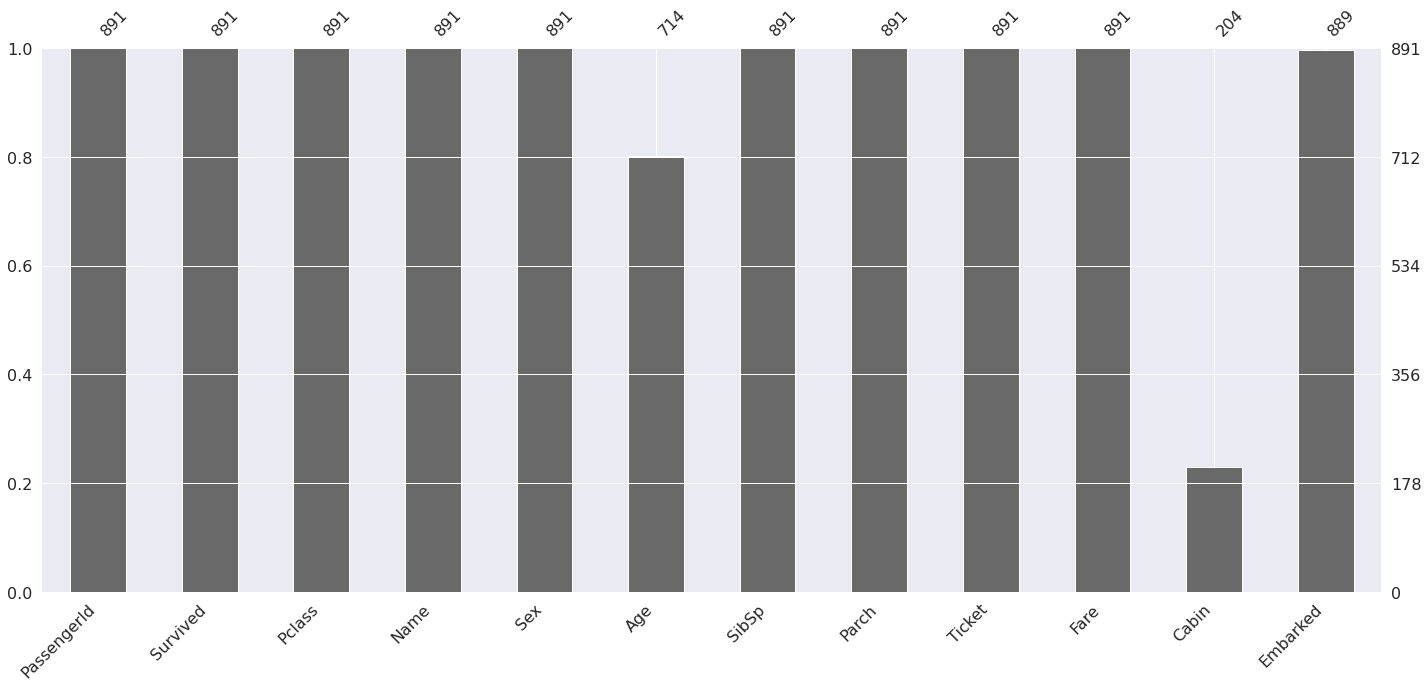

<Figure size 432x360 with 0 Axes>

In [ ]:
#Visualising the null data
import missingno as msno
msno.bar(train_df)
plt.figure(figsize=(6,5))
plt.show()

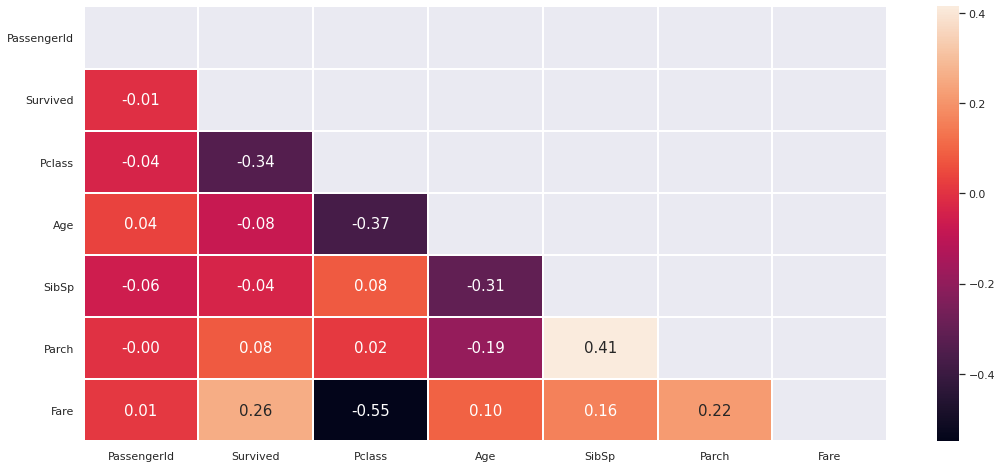

In [ ]:
# heatmap

plt.figure(figsize = (18, 8))

corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f', linewidths = 1, annot_kws = {'size' : 15})
plt.show()

**Heatmap is not useful in case of categorical variables, so we will analyse each column to check how each column is contributing in prediction.**

# Survived Column

In [ ]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
len(train_df.Survived.unique())

2

**Bar Chart of Survived**

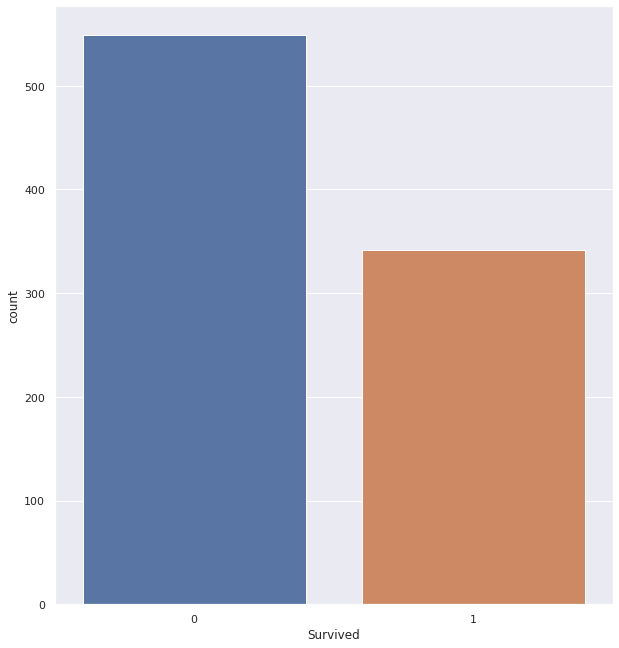

In [ ]:
plt.figure(figsize=(10,11))
sns.countplot('Survived', data=train_df)
plt.show()

**So from this we can conclude the the number of people not survived is greater than those who survived**

**Pie chart of Survived**

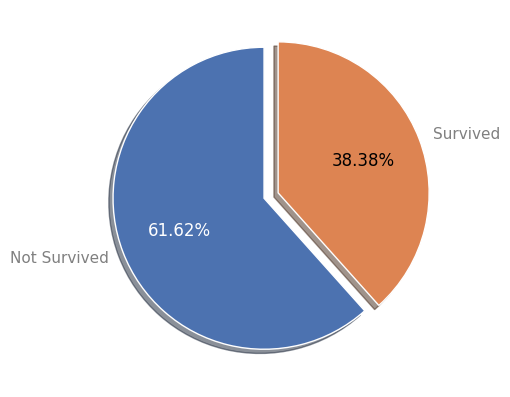

In [ ]:
values=train_df['Survived'].value_counts()
labels=['Not Survived', 'Survived']
fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode=(0,0.1)   #Maybe you want one of the wedges to stand out? The explode parameter allows you to do that.
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

# Pclass

In [ ]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**Bar Chart**

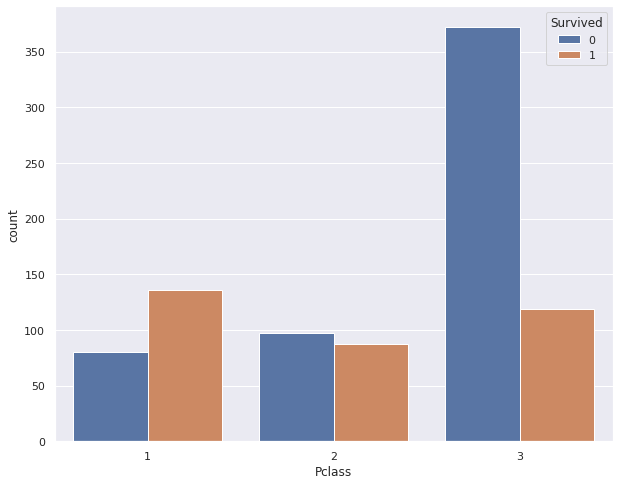

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot('Pclass',hue='Survived', data=train_df)
plt.show()

**From this we can conclude that People in class 1 has higher chances of survival than the people in other classes**

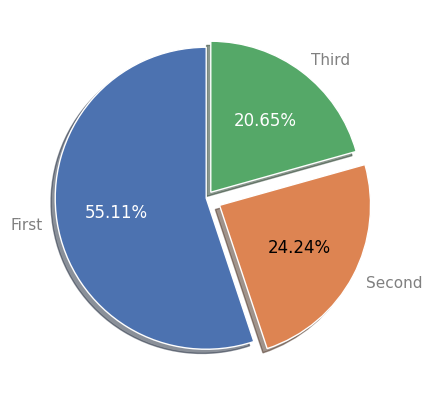

In [ ]:
values=train_df['Pclass'].value_counts()
labels=['First', 'Second', 'Third']
fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode=(0,0.1,0.05)   #Maybe you want one of the wedges to stand out? The explode parameter allows you to do that.
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

**So there are much more people in first class as compared to other classes**

# Name

In [ ]:
train_df.Name.value_counts()

Hippach, Mrs. Louis Albert (Ida Sophia Fischer)        1
Caldwell, Master. Alden Gates                          1
Kallio, Mr. Nikolai Erland                             1
Woolner, Mr. Hugh                                      1
Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengtsson)    1
                                                      ..
Montvila, Rev. Juozas                                  1
Herman, Mrs. Samuel (Jane Laver)                       1
Sage, Mr. Douglas Bullen                               1
Smith, Mr. Thomas                                      1
Osman, Mrs. Mara                                       1
Name: Name, Length: 891, dtype: int64

In [ ]:
len(train_df.Name.unique()),train_df.shape

(891, (891, 12))

**So we can see that there is unique name for each passenger, So we can say that there is no significance of Name **

# Sex Column

In [ ]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
train_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

**Bar Chart(Just no of male and female)**

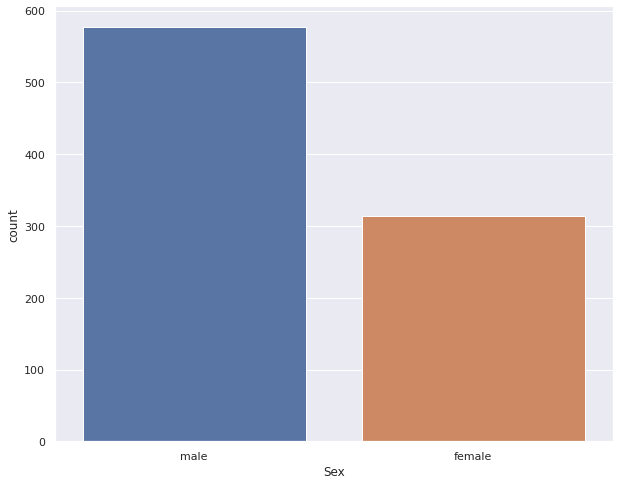

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot('Sex', data=train_df)
plt.show()

**Bar Chart(Surviving male and female)**

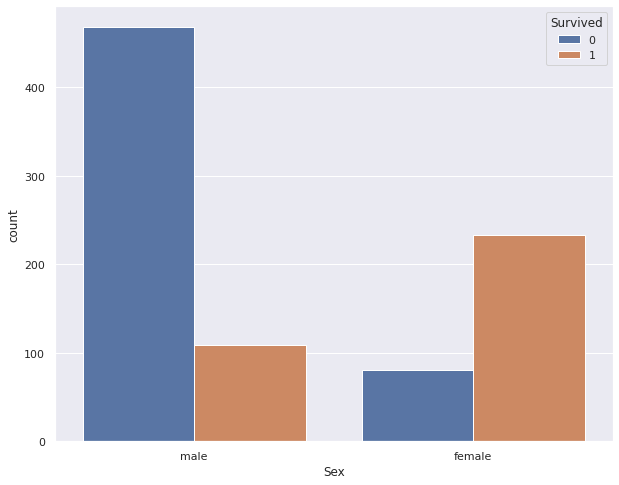

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot('Sex',hue='Survived' ,data=train_df)
plt.show()

**From this we can see that the chances of survival of female is  higher as compared to male**

**Bar Chart(Surviving male and female in differrent classes)**

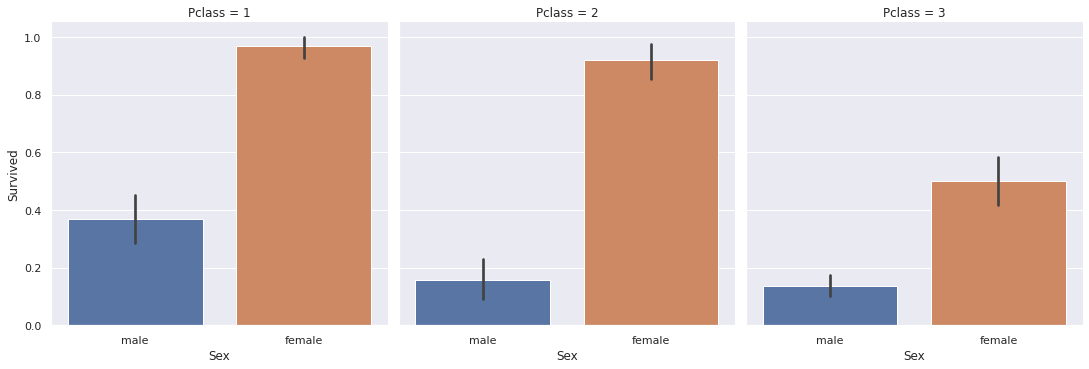

In [ ]:

sns.catplot(x='Sex',y='Survived' ,data=train_df, kind='bar', col='Pclass')
plt.show()

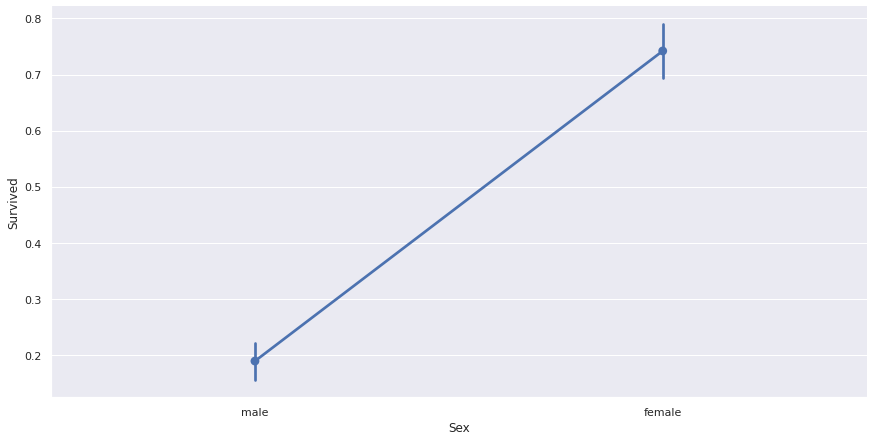

In [ ]:
sns.catplot(x='Sex',y='Survived' ,data=train_df, kind='point',aspect=2,height=6)
plt.show()

<Figure size 1152x864 with 0 Axes>

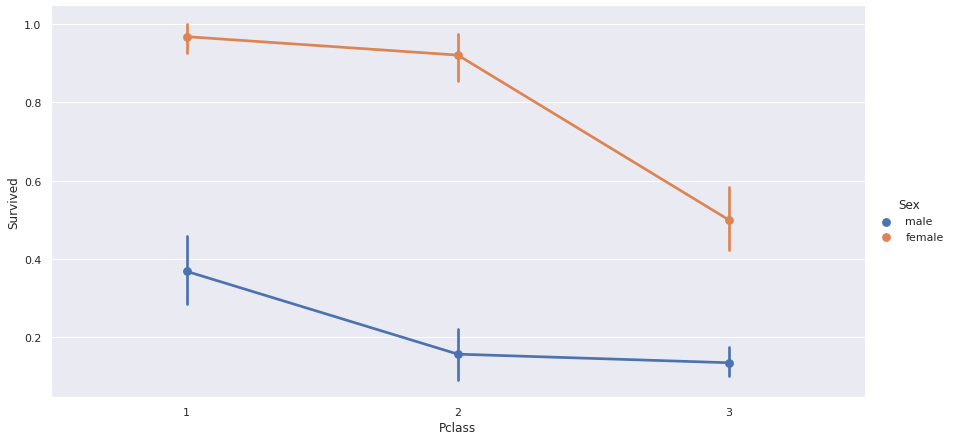

In [ ]:
plt.figure(figsize=(16,12))
sns.catplot(x='Pclass',y='Survived' ,data=train_df, kind='point',aspect=2,height=6,hue='Sex')
plt.show()

# Age Columns

<Figure size 1152x576 with 0 Axes>

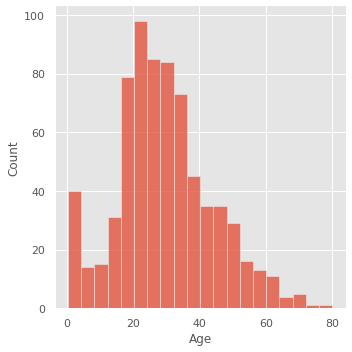

In [ ]:
plt.figure(figsize=(16,8))
plt.style.use('ggplot')
sns.displot(train_df['Age'])
plt.show()

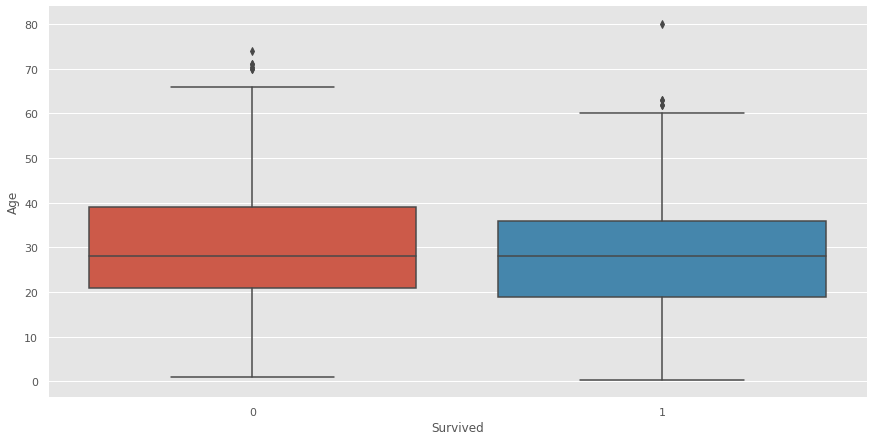

In [ ]:
sns.catplot(x='Survived', y='Age', data=train_df,kind='box', aspect=2,height=6 )
plt.show()

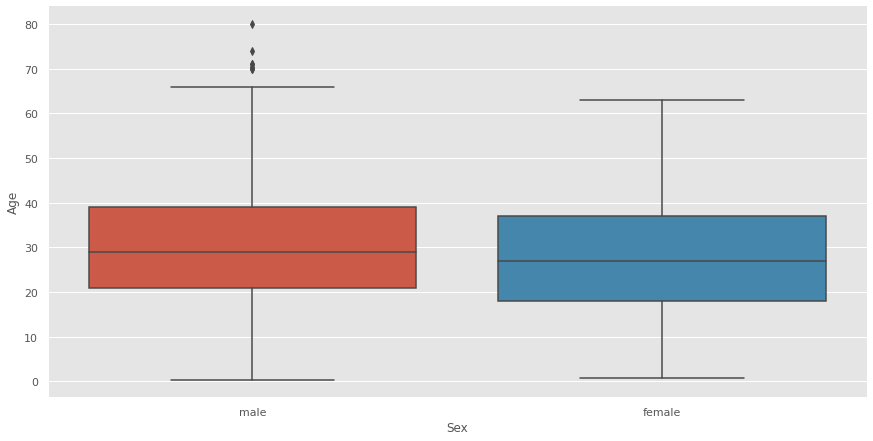

In [ ]:
sns.catplot(x='Sex', y='Age', kind='box',data=train_df, height=6, aspect=2)
plt.show()

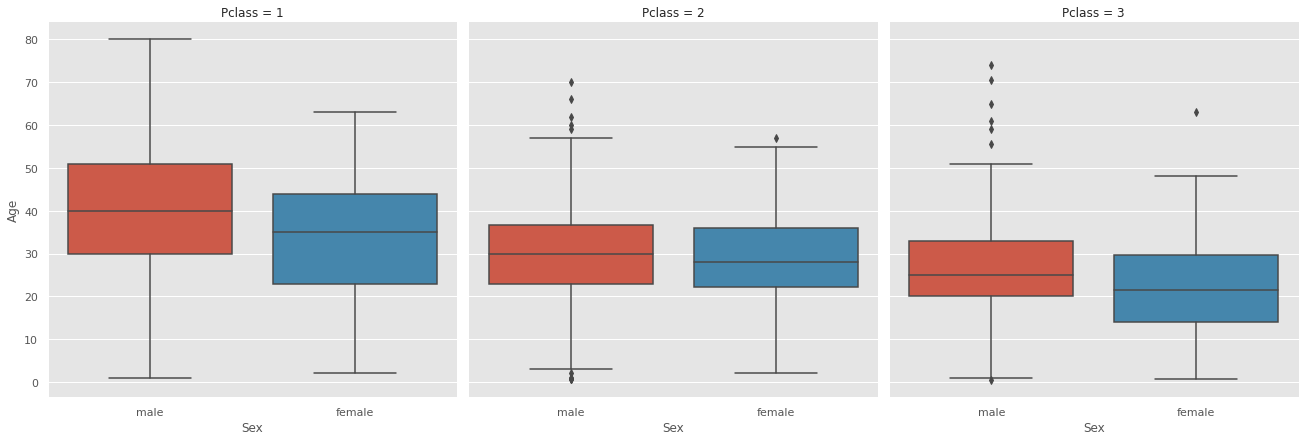

In [ ]:
sns.catplot(x='Sex', y='Age', kind='box',data=train_df, height=6, aspect=1,col='Pclass')
plt.show()

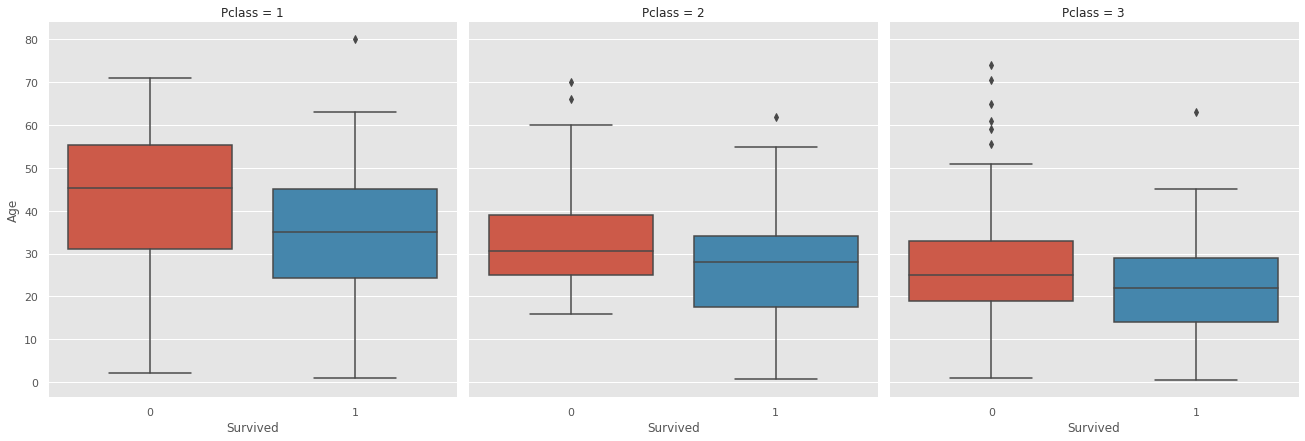

In [ ]:
sns.catplot(x='Survived', y='Age', kind='box',data=train_df, height=6, aspect=1,col='Pclass')
plt.show()

# SibSp(Having Sibling, Spouse)

In [ ]:
len(train_df.SibSp.unique())

7

In [ ]:
train_df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

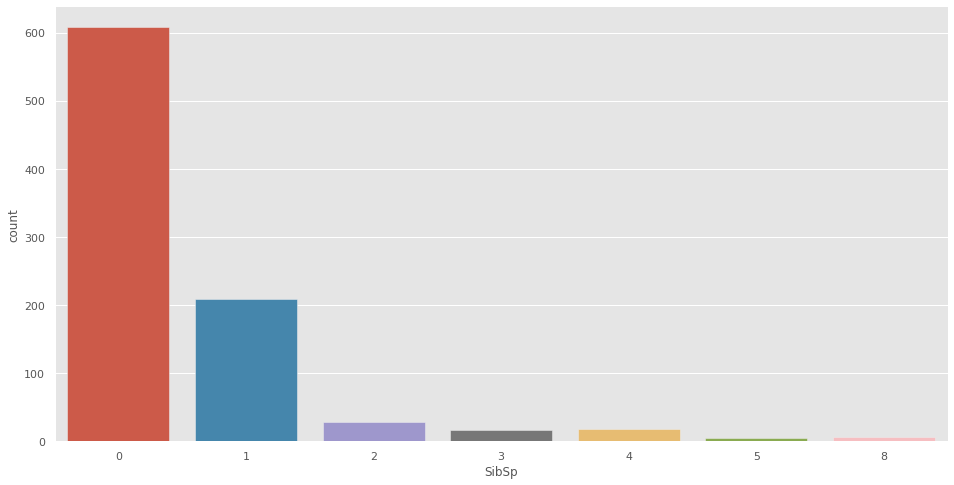

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot('SibSp', data=train_df)
plt.show()

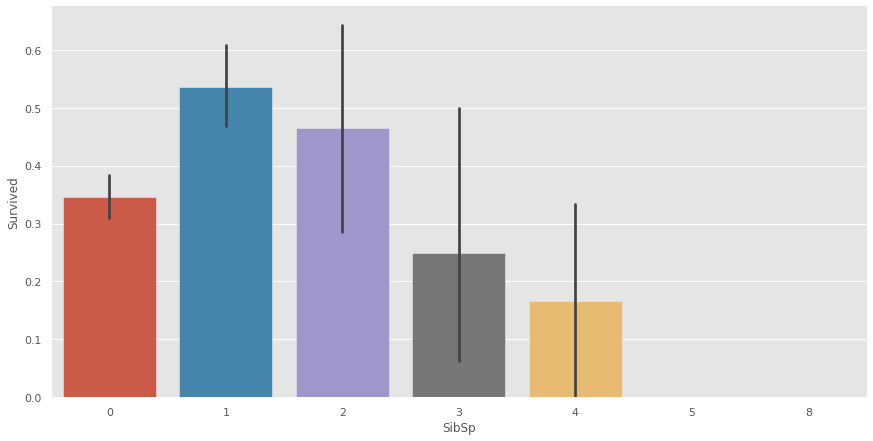

In [ ]:
sns.catplot(x='SibSp', y='Survived', kind='bar', aspect=2,height=6,data=train_df)
plt.show()

**We can see that the survival of the passenger depends upon the number of SibSp**

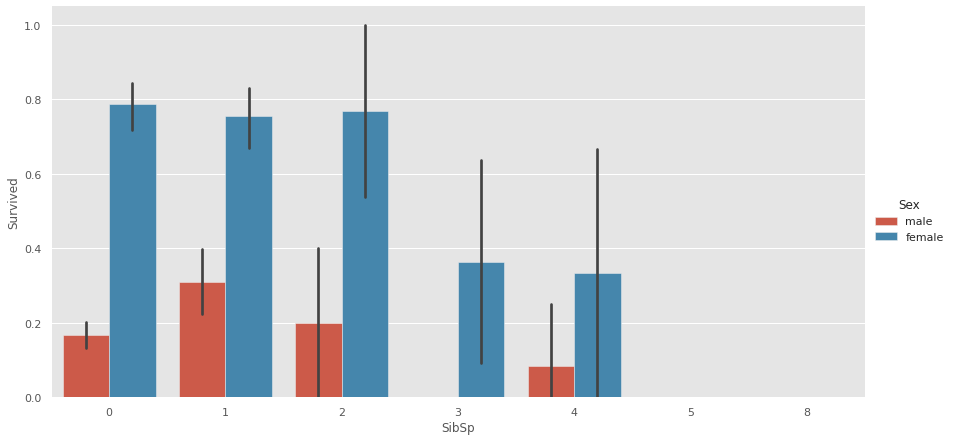

In [ ]:
sns.catplot(x='SibSp', y='Survived', kind='bar', aspect=2,height=6,data=train_df,hue='Sex')
plt.show()

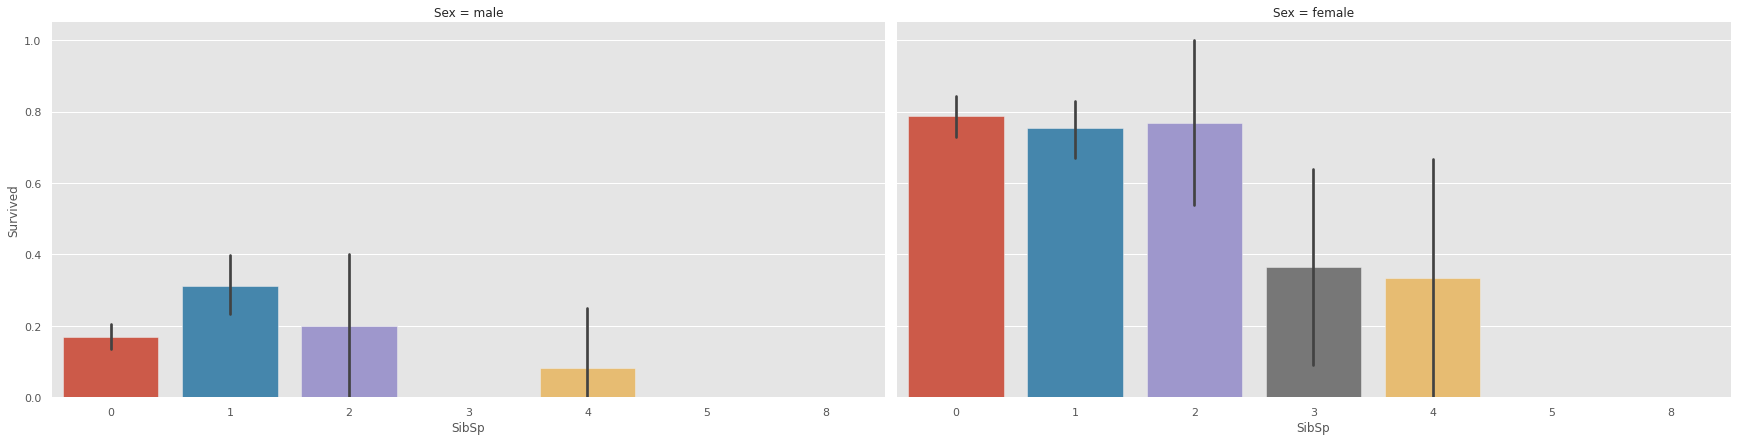

In [ ]:
sns.catplot(x='SibSp', y='Survived', kind='bar', aspect=2,height=6,data=train_df,col='Sex')
plt.show()

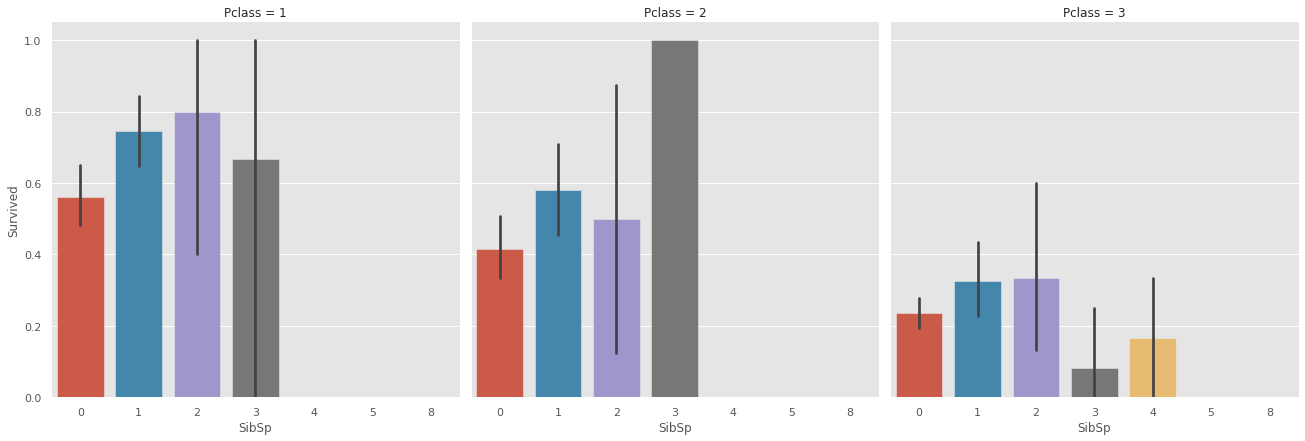

In [ ]:
sns.catplot(x='SibSp', y='Survived', kind='bar', aspect=1,height=6,data=train_df,col='Pclass')
plt.show()

# Parch

In [ ]:
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

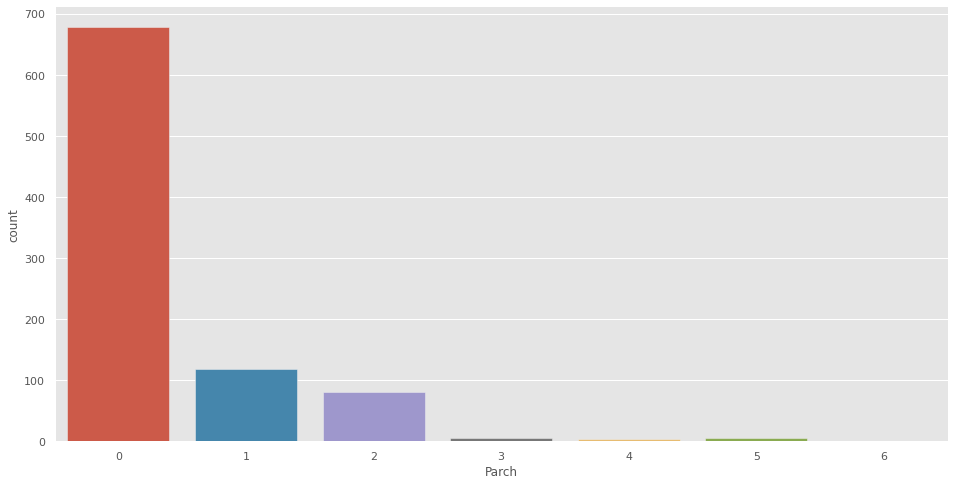

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot('Parch', data=train_df)
plt.show()


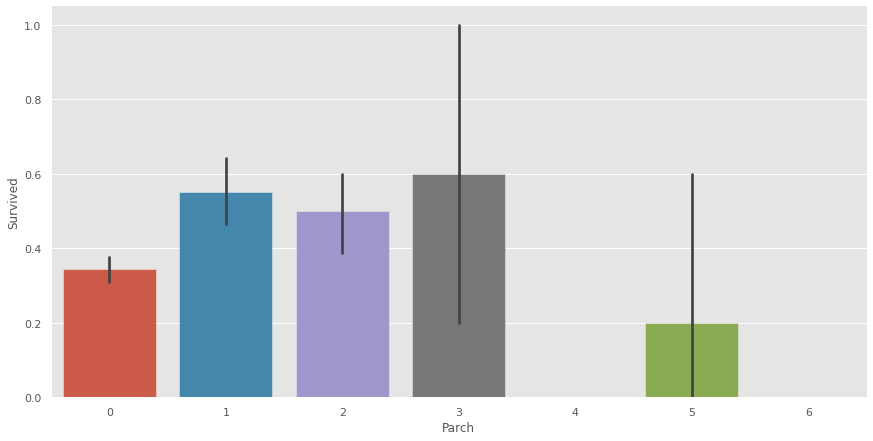

In [ ]:
sns.catplot(x='Parch', y='Survived', kind='bar', aspect=2,height=6,data=train_df)
plt.show()

# Ticket

In [ ]:
train_df.Ticket.value_counts()

CA. 2343      7
347082        7
1601          7
347088        6
CA 2144       6
             ..
35851         1
315037        1
11755         1
C.A. 34260    1
C.A. 31026    1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
len(train_df.Ticket.unique())

681

**So we can see that there are so many unique values for the ticket variable so we can conclude that it is not of any influence on the survival**

# Fare

In [ ]:
train_df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [ ]:
len(train_df.Fare.unique())

248

But sill these are floats and not categorical varriable so we can still use it

<Figure size 1152x576 with 0 Axes>

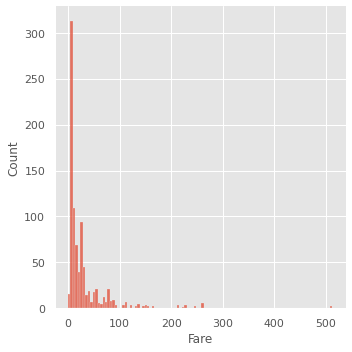

In [ ]:
plt.figure(figsize=(16,8))
sns.displot(train_df['Fare'])
plt.show()

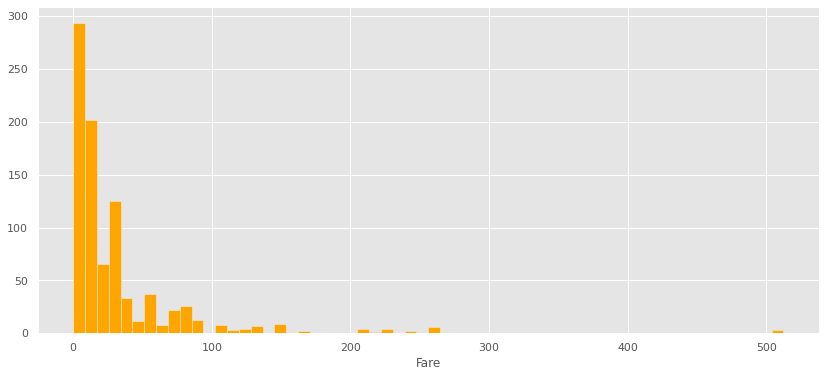

In [ ]:
plt.figure(figsize = (14, 6))

plt.hist(train_df.Fare, bins = 60, color = 'orange')
plt.xlabel('Fare')
plt.show()

So we can see there are a lot of null values we will deal with that in the data preprocessing phase

# Cabinn

In [ ]:
train_df.Cabin.shape

(891,)

In [ ]:
train_df.Cabin.isna().sum()

687

**So we can see that out of 891, 687 are null values in the cabin column so it will be better to exlude it **

# Embarked

In [ ]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

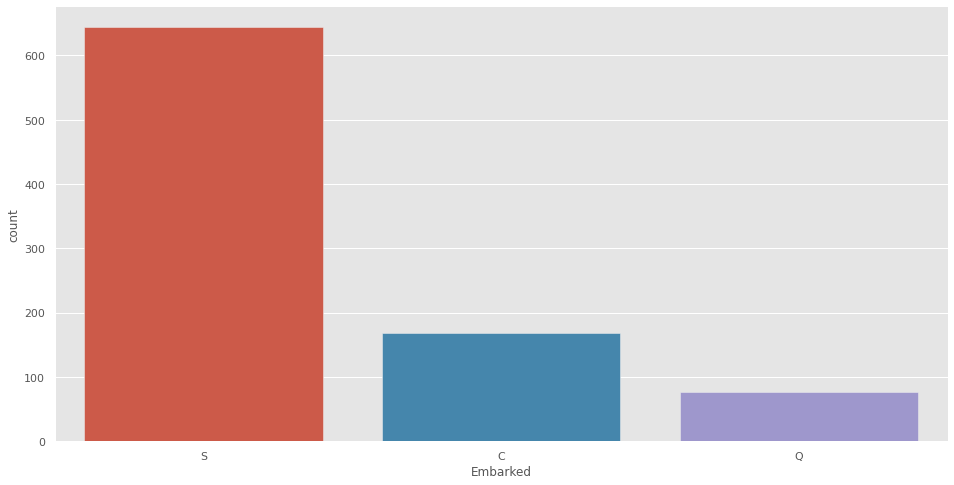

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot('Embarked', data=train_df)
plt.show()


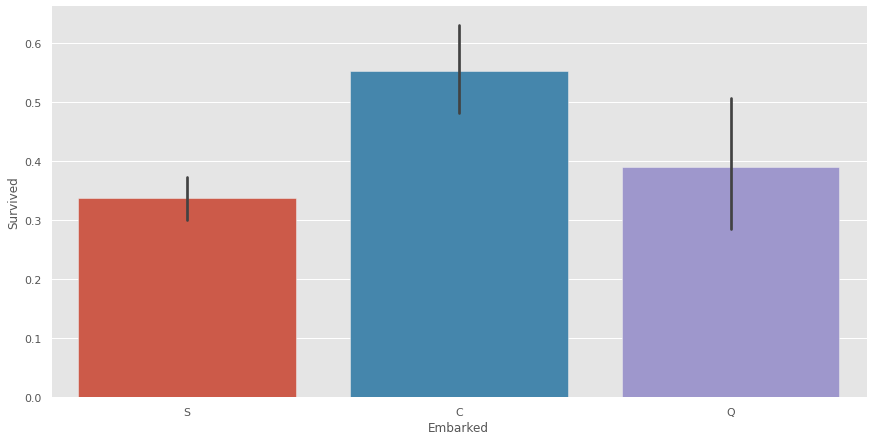

In [ ]:
sns.catplot(x='Embarked', y='Survived', kind='bar', aspect=2,height=6,data=train_df)
plt.show()

# Conclusion of the EDA Section



  Number of people survived is less than the people who did'nt .

  People in class 1 has higher chances of survival than the people in other classes. So survival depends on Pclass.

  Name has distinct values so it is better to drop it.

  Chances of survial of female is higher than the male. So Sex is of significance.

  Age, SibSp, Parch, Embarked all these are significant, variables.

  Ticket has many unique values thus better drop it.

  Cabin has a lot of null values so it should be dropped










# Data Preprocessing

In [ ]:
#Drop Name, Ticket , Cabin

train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#Dealing with the null values
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
# replacing Zero values of "Fare" column with mean of column

train_df['Fare'] = train_df['Fare'].replace(0, train_df['Fare'].mean())

In [ ]:
# filling null values of "Age" column with mean value of the column

train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)


In [ ]:
# filling null values of "Embarked" column with mode value of the column
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [ ]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Encoding

In [ ]:
train_df['Embarked'] = train_df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,0
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,0


In [ ]:
train_df['Sex'] = train_df['Sex'].apply(lambda val: 1 if val == 'male' else 0)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [ ]:
train_df.var()

Survived       0.236772
Pclass         0.699015
Sex            0.228475
Age          169.052400
SibSp          1.216043
Parch          0.649728
Fare        2451.663181
Embarked       0.404081
dtype: float64

**We can see that Age and Fare have very high variance then we will have to apply Normalization**

In [ ]:
train_df['Age'] = np.log(train_df['Age'])
train_df['Fare'] = np.log(train_df['Fare'])

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,3.091042,1,0,1.981001,0
1,1,1,0,3.637586,1,0,4.266662,1
2,1,3,0,3.258097,0,0,2.070022,0
3,1,1,0,3.555348,1,0,3.972177,0
4,0,3,1,3.555348,0,0,2.085672,0


In [ ]:
train_df.var()

Survived    0.236772
Pclass      0.699015
Sex         0.228475
Age         0.499292
SibSp       1.216043
Parch       0.649728
Fare        0.866881
Embarked    0.404081
dtype: float64

**Now our training data looks much better now we will go for the test data**

In [ ]:
test_df=pd.read_csv('test.csv')

**Perform Same steps on test data**

In [ ]:
#Drop Name, Ticket , Cabin

test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [ ]:
# replacing Zero values of "Fare" column with mean of column

test_df['Fare'] = test_df['Fare'].replace(0, test_df['Fare'].mean())

In [ ]:
# filling null values of "Age" column with mean value of the column

test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)

In [ ]:
# filling null values of "Embarked" column with mode value of the column
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)


In [ ]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
test_df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [ ]:
#filling null values of "Fare" column with mean value of the column

test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

In [ ]:
test_df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
test_df['Embarked'] = test_df['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [ ]:
test_df['Sex'] = test_df['Sex'].apply(lambda val: 1 if val == 'male' else 0)

In [ ]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [ ]:
test_df['Age'] = np.log(test_df['Age'])
test_df['Fare'] = np.log(test_df['Fare'])

In [ ]:
test_df.var()

Pclass      0.708690
Sex         0.231960
Age         0.482596
SibSp       0.804178
Parch       0.963203
Fare        0.973274
Embarked    0.469932
dtype: float64

In [ ]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,3.540959,0,0,2.057860,2
1,3,0,3.850148,1,0,1.945910,0
2,2,1,4.127134,0,0,2.270836,2
3,3,1,3.295837,0,0,2.159003,0
4,3,0,3.091042,1,1,2.508582,0


**Now both training and test data is cleaned and preprocessed, let's start with model building.**

In [ ]:
# creating X and y

X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [ ]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# accuracy score, confusion matrix and classification report of logistic regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy of Logistic Regression is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Test Accuracy of Logistic Regression is {lr_acc}")

print(confusion_matrix(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

Training Accuracy of Logistic Regression is 0.8105939004815409
Test Accuracy of Logistic Regression is 0.8134328358208955
[[145  23]
 [ 27  73]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.76      0.73      0.74       100

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



# KNN (unsupervised)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kr=KNeighborsClassifier()
kr.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# accuracy score, confusion matrix and classification report of logistic regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

kr_acc = accuracy_score(y_test, kr.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, kr.predict(X_train))}")
print(f"Test Accuracy of KNN is {kr_acc}")

print(confusion_matrix(y_test, kr.predict(X_test)))
print(classification_report(y_test, kr.predict(X_test)))

Training Accuracy of KNN is 0.8635634028892456
Test Accuracy of KNN is 0.7910447761194029
[[140  28]
 [ 28  72]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.72      0.72      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



# **Decision Tress**

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
dr=DecisionTreeClassifier()
dr.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# accuracy score, confusion matrix and classification report of logistic regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dr_acc = accuracy_score(y_test, dr.predict(X_test))

print(f"Training Accuracy is {accuracy_score(y_train, dr.predict(X_train))}")
print(f"Test Accuracy is {dr_acc}")

print(confusion_matrix(y_test, dr.predict(X_test)))
print(classification_report(y_test, dr.predict(X_test)))

Training Accuracy is 0.9791332263242376
Test Accuracy is 0.7798507462686567
[[142  26]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       168
           1       0.72      0.67      0.69       100

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rr=RandomForestClassifier()
rr.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# accuracy score, confusion matrix and classification report of logistic regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rr_acc = accuracy_score(y_test, rr.predict(X_test))

print(f"Training Accuracy  is {accuracy_score(y_train, rr.predict(X_train))}")
print(f"Test Accuracy  is {rr_acc}")

print(confusion_matrix(y_test, rr.predict(X_test)))
print(classification_report(y_test, rr.predict(X_test)))

Training Accuracy  is 0.9791332263242376
Test Accuracy  is 0.8283582089552238
[[148  20]
 [ 26  74]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       168
           1       0.79      0.74      0.76       100

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



#Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ar=AdaBoostClassifier()
ar.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
# accuracy score, confusion matrix and classification report of logistic regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ar_acc = accuracy_score(y_test, ar.predict(X_test))

print(f"Training Accuracy  is {accuracy_score(y_train, ar.predict(X_train))}")
print(f"Test Accuracy  is {ar_acc}")

print(confusion_matrix(y_test, ar.predict(X_test)))
print(classification_report(y_test, ar.predict(X_test)))

Training Accuracy  is 0.8394863563402889
Test Accuracy  is 0.8059701492537313
[[143  25]
 [ 27  73]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       168
           1       0.74      0.73      0.74       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gr=GradientBoostingClassifier()
gr.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# accuracy score, confusion matrix and classification report of logistic regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gr_acc = accuracy_score(y_test, gr.predict(X_test))

print(f"Training Accuracy  is {accuracy_score(y_train, gr.predict(X_train))}")
print(f"Test Accuracy  is {gr_acc}")

print(confusion_matrix(y_test, gr.predict(X_test)))
print(classification_report(y_test, gr.predict(X_test)))

Training Accuracy  is 0.9085072231139647
Test Accuracy  is 0.8395522388059702
[[153  15]
 [ 28  72]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       168
           1       0.83      0.72      0.77       100

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.82       268
weighted avg       0.84      0.84      0.84       268



#Stochastic Gradient Boosting (SGB)

In [ ]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {sgb_acc} \n")

print(f"{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(classification_report(y_test, sgb.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.9020866773675762
Test Accuracy of Decision Tree Classifier is 0.8432835820895522 

[[152  16]
 [ 26  74]]

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       168
           1       0.82      0.74      0.78       100

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



# Xg Boost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=180, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {xgb_acc} \n")

print(f"{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(classification_report(y_test, xgb.predict(X_test)))

Training Accuracy of Decision Tree Classifier is 0.9454253611556982
Test Accuracy of Decision Tree Classifier is 0.8246268656716418 

[[147  21]
 [ 26  74]]

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       168
           1       0.78      0.74      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost'],
    'Score' : [lr_acc, kr_acc, dr_acc, rr_acc, ar_acc, gr_acc, sgb_acc, xgb_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,Stochastic Gradient Boosting,0.843284
5,Gradient Boosting Classifier,0.839552
3,Random Forest Classifier,0.828358
7,XgBoost,0.824627
0,Logistic Regression,0.813433
4,Ada Boost Classifier,0.805970
1,KNN,0.791045
2,Decision Tree Classifier,0.779851


**So we see that Gradient Boosting classifier gives us the best result so we will use that with sgb boosting**

# Prediction

In [ ]:
#predictions
predictions = sgb.predict(test_df)
print(predictions)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0]


In [ ]:
pred = pd.DataFrame(predictions)
sub_df = pd.read_csv('gender_submission.csv')
sub_df['Survived'] = pred
sub_df.to_csv('Submission.csv', index = False)